[*********************100%***********************]  1 of 1 completed

Epoch 1/20



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0852
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0066
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0057
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0045
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0045
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0038
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0042
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0043
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0032
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0035
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0033
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0036
Epoch 13/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0038
Epoch 14/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0037
Epoch 15/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0028
Epoch 16/20
21

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1037
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0917
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0695
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0282
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 
Epoch 13/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031  
Epoch 14/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032  
Epoch 15/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 
Epoch 16/20
21/21 ━━━━

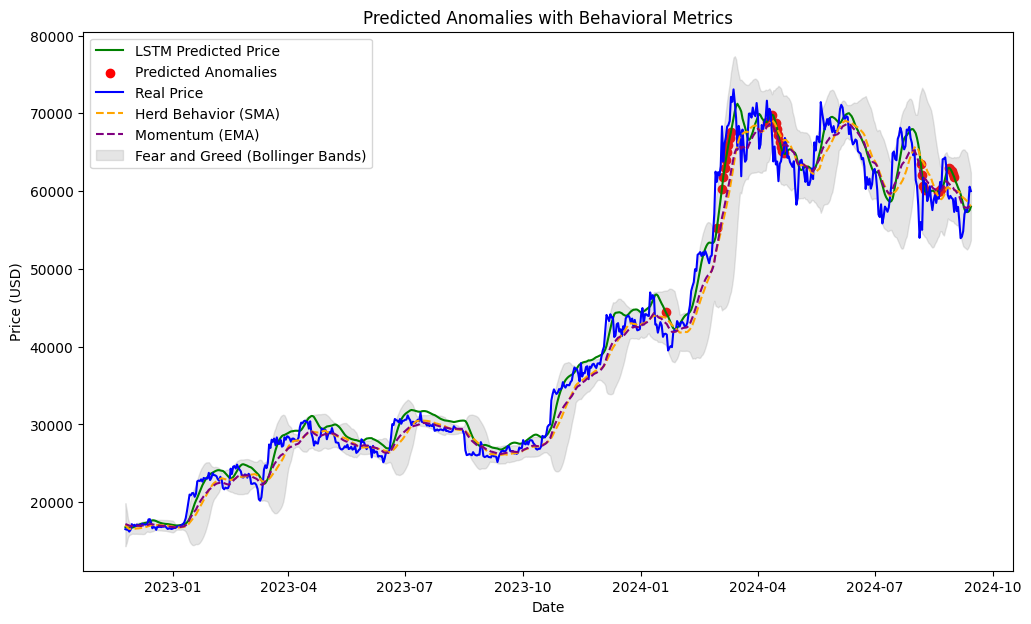

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Model
import shap

# Step 1: Load Bitcoin Data (yfinance)
bitcoin_data = yf.download('BTC-USD', start='2022-09-07', end='2024-09-15')
bitcoin_data = bitcoin_data[['Close', 'Volume']].copy()

# Step 2: Preprocessing - Calculate Behavioral Metrics
bitcoin_data['SMA_20'] = bitcoin_data['Close'].rolling(window=20).mean()
bitcoin_data['EMA_20'] = bitcoin_data['Close'].ewm(span=20, adjust=False).mean()
bitcoin_data['Volatility'] = bitcoin_data['Close'].rolling(window=20).std()  # Volatility as a behavioral metric

# Bollinger Bands
bitcoin_data['Bollinger_Upper'] = bitcoin_data['SMA_20'] + (bitcoin_data['Volatility'] * 2)
bitcoin_data['Bollinger_Lower'] = bitcoin_data['SMA_20'] - (bitcoin_data['Volatility'] * 2)

# Drop NaN values from rolling calculations
bitcoin_data.dropna(inplace=True)

# Step 3: Normalize Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(bitcoin_data[['Close']])

# Step 4: Prepare LSTM Sequences for Prediction and Flatten for Autoencoder
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

seq_length = 60  # Use 60 days of historical data to predict the next day
X_lstm = create_sequences(scaled_data, seq_length)
y_lstm = scaled_data[seq_length:]

# Flatten the LSTM sequence data for the Autoencoder
X_train_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1]))

# Step 5: Build LSTM Model for Time-Series Forecasting
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_lstm, y_lstm, epochs=20, batch_size=32)

# Step 6: Predict Future Prices
predicted_prices_lstm = lstm_model.predict(X_lstm[-len(X_lstm):])
real_prices = y_lstm[-len(X_lstm):]

# Step 7: Anomaly Detection with Autoencoder (reshaped for input compatibility)
input_dim = X_train_lstm.shape[-1]
autoencoder = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_lstm, X_train_lstm, epochs=20, batch_size=32)

# Calculate reconstruction error for anomaly detection
reconstructed = autoencoder.predict(X_train_lstm)
reconstruction_error = np.mean(np.abs(X_train_lstm - reconstructed), axis=1)

# Set anomaly threshold (95th percentile of reconstruction error)
anomaly_threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > anomaly_threshold

# Step 8: Visualization with Behavioral Metrics and Explainable AI (SHAP)
plt.figure(figsize=(12, 7))
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], scaler.inverse_transform(predicted_prices_lstm), label='LSTM Predicted Price', color='green')
plt.scatter(bitcoin_data.index[-len(predicted_prices_lstm):][anomalies],
            scaler.inverse_transform(predicted_prices_lstm)[anomalies],
            color='red', label='Predicted Anomalies')
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['Close'][-len(predicted_prices_lstm):], label='Real Price', color='blue')
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['SMA_20'][-len(predicted_prices_lstm):], '--', label='Herd Behavior (SMA)', color='orange')
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['EMA_20'][-len(predicted_prices_lstm):], '--', label='Momentum (EMA)', color='purple')
plt.fill_between(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['Bollinger_Upper'][-len(predicted_prices_lstm):],
                 bitcoin_data['Bollinger_Lower'][-len(predicted_prices_lstm):], color='gray', alpha=0.2, label='Fear and Greed (Bollinger Bands)')
plt.title('Predicted Anomalies with Behavioral Metrics')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


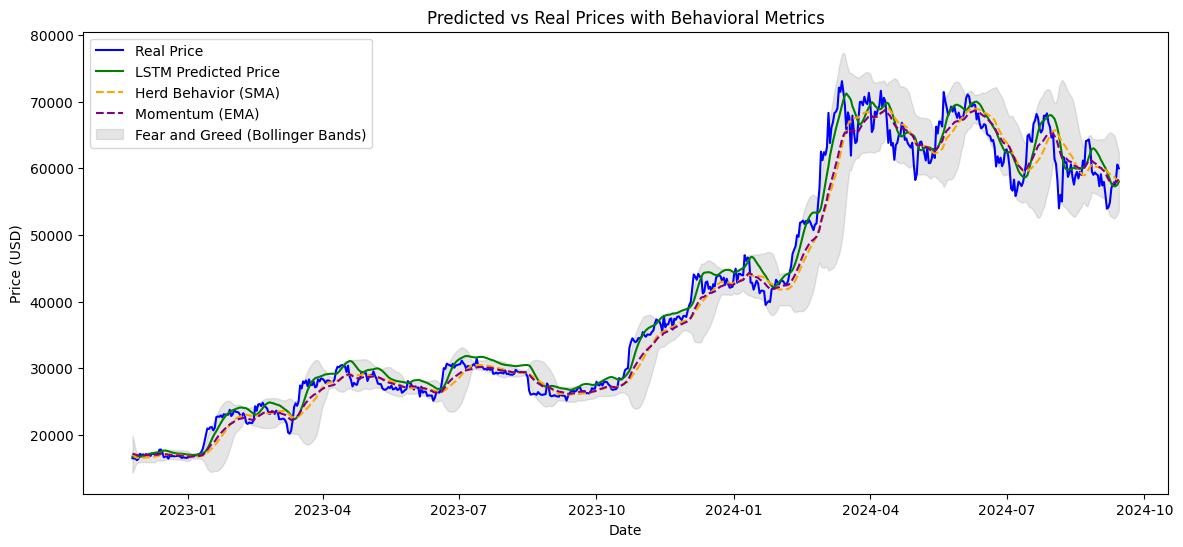

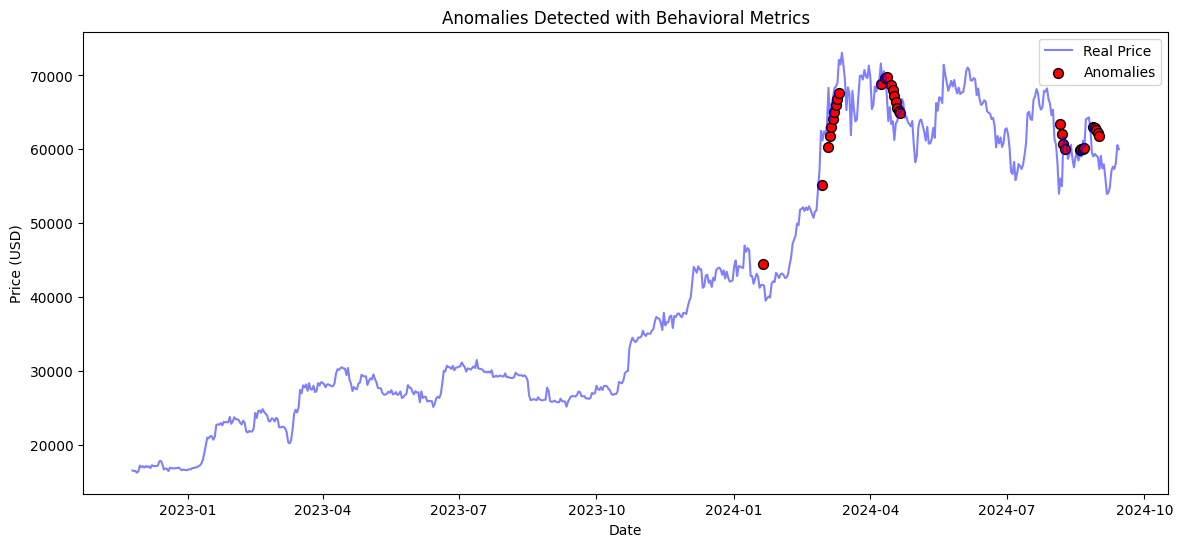

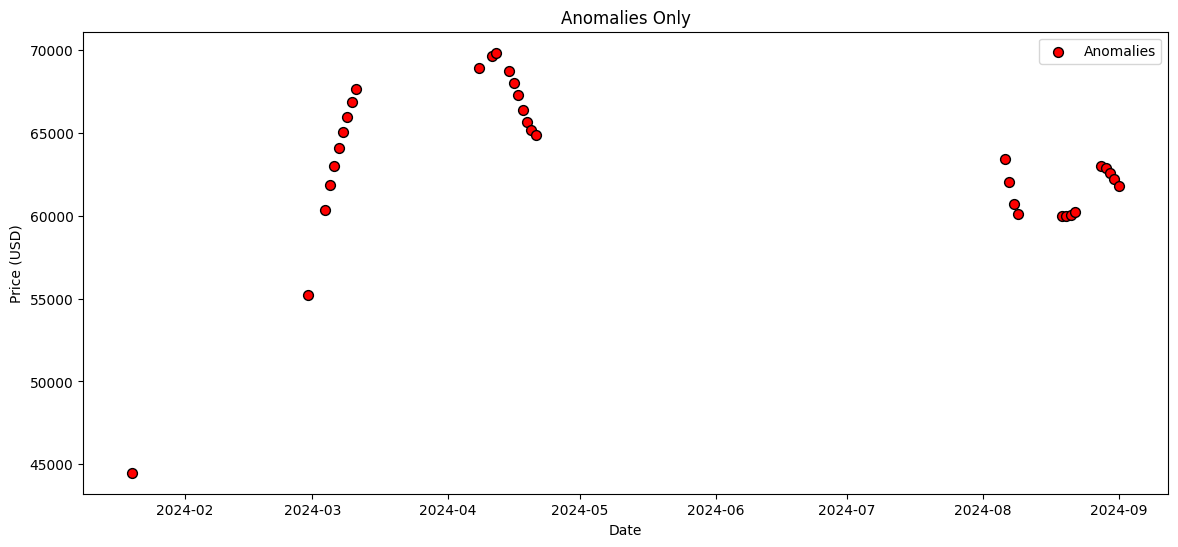

In [ ]:
import matplotlib.pyplot as plt

# Visualization: Normal and Anomalous Data in Separate Graphs

# Step 1: Plot Real vs. Predicted Prices
plt.figure(figsize=(14, 6))
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['Close'][-len(predicted_prices_lstm):], label='Real Price', color='blue')
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], scaler.inverse_transform(predicted_prices_lstm), label='LSTM Predicted Price', color='green')
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['SMA_20'][-len(predicted_prices_lstm):], '--', label='Herd Behavior (SMA)', color='orange')
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['EMA_20'][-len(predicted_prices_lstm):], '--', label='Momentum (EMA)', color='purple')
plt.fill_between(bitcoin_data.index[-len(predicted_prices_lstm):],
                 bitcoin_data['Bollinger_Upper'][-len(predicted_prices_lstm):],
                 bitcoin_data['Bollinger_Lower'][-len(predicted_prices_lstm):],
                 color='gray', alpha=0.2, label='Fear and Greed (Bollinger Bands)')
plt.title('Predicted vs Real Prices with Behavioral Metrics')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Step 2: Plot the Anomalies Separately
plt.figure(figsize=(14, 6))
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['Close'][-len(predicted_prices_lstm):], label='Real Price', color='blue', alpha=0.5)
plt.scatter(bitcoin_data.index[-len(predicted_prices_lstm):][anomalies],
            scaler.inverse_transform(predicted_prices_lstm)[anomalies],
            color='red', label='Anomalies', marker='o', s=50, edgecolor='black')
plt.title('Anomalies Detected with Behavioral Metrics')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Optional: Plot Just the Anomalies Highlighted Over Time
plt.figure(figsize=(14, 6))
plt.scatter(bitcoin_data.index[-len(predicted_prices_lstm):][anomalies],
            scaler.inverse_transform(predicted_prices_lstm)[anomalies],
            color='red', label='Anomalies', marker='o', s=50, edgecolor='black')
plt.title('Anomalies Only')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


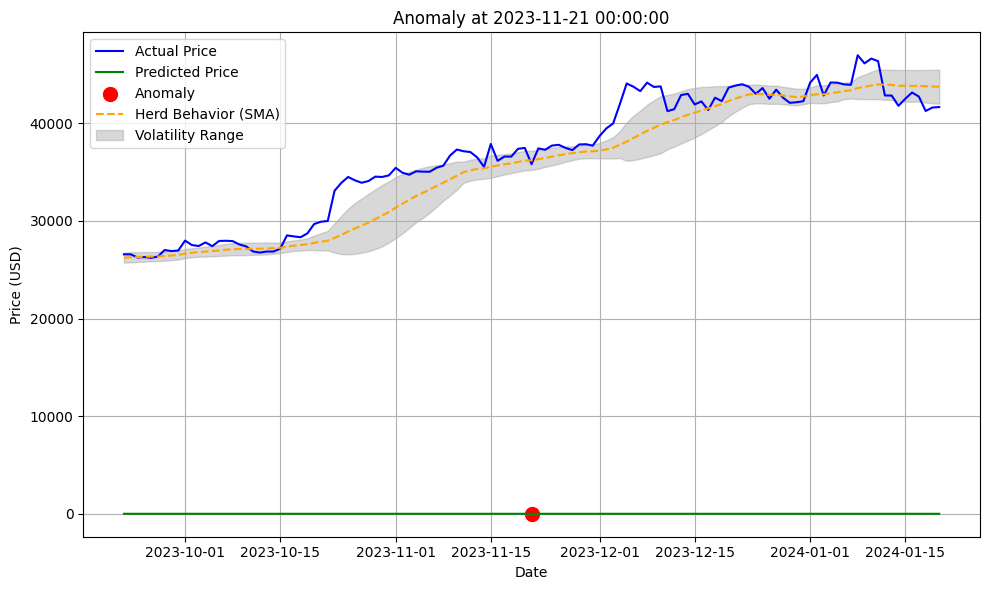

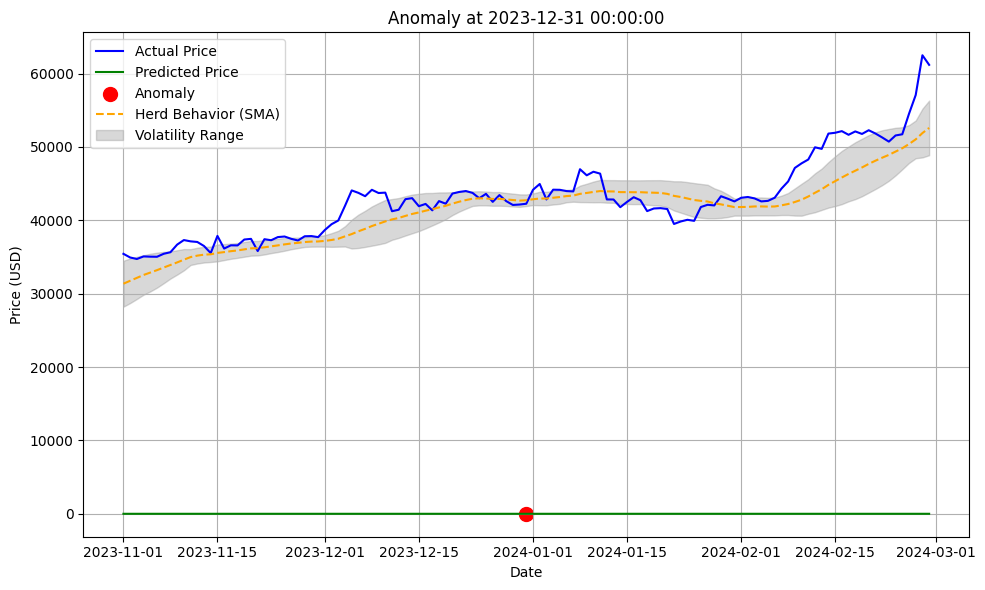

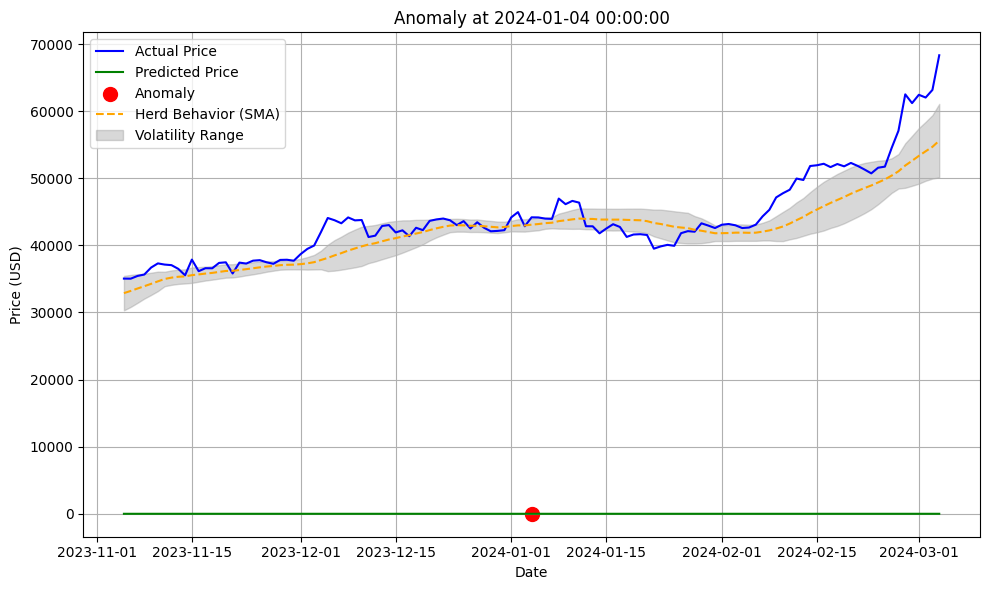

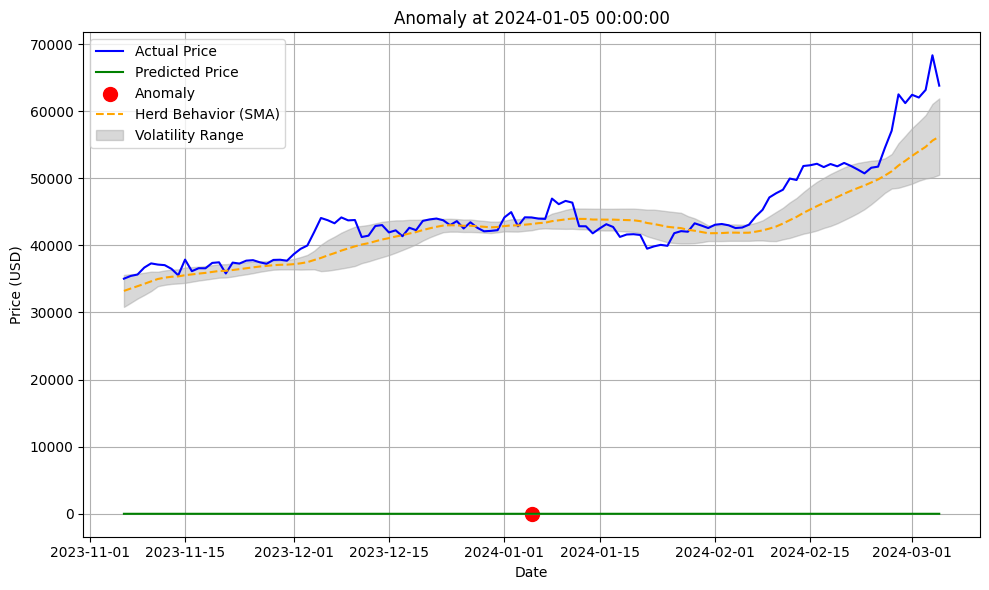

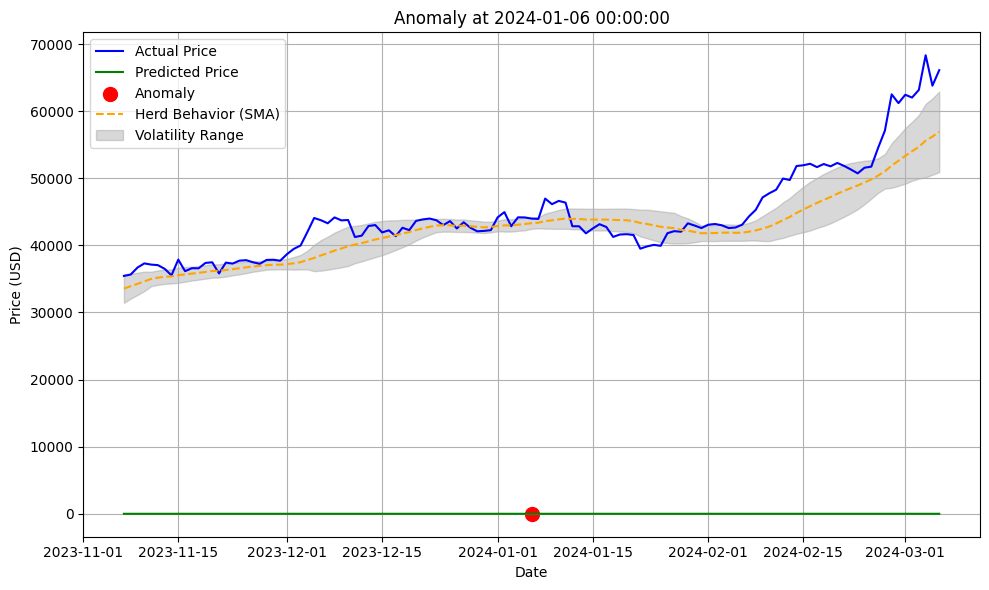

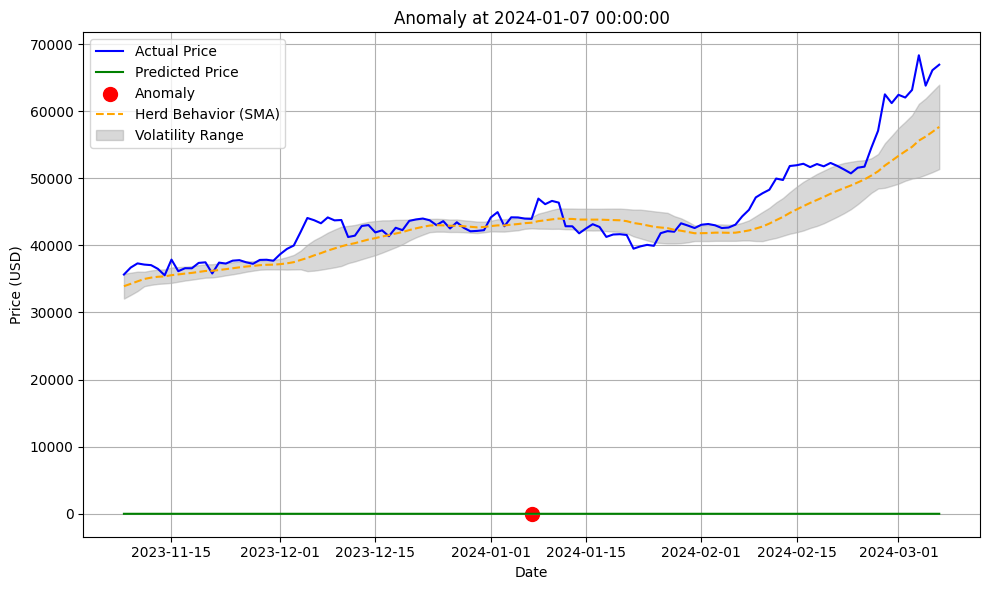

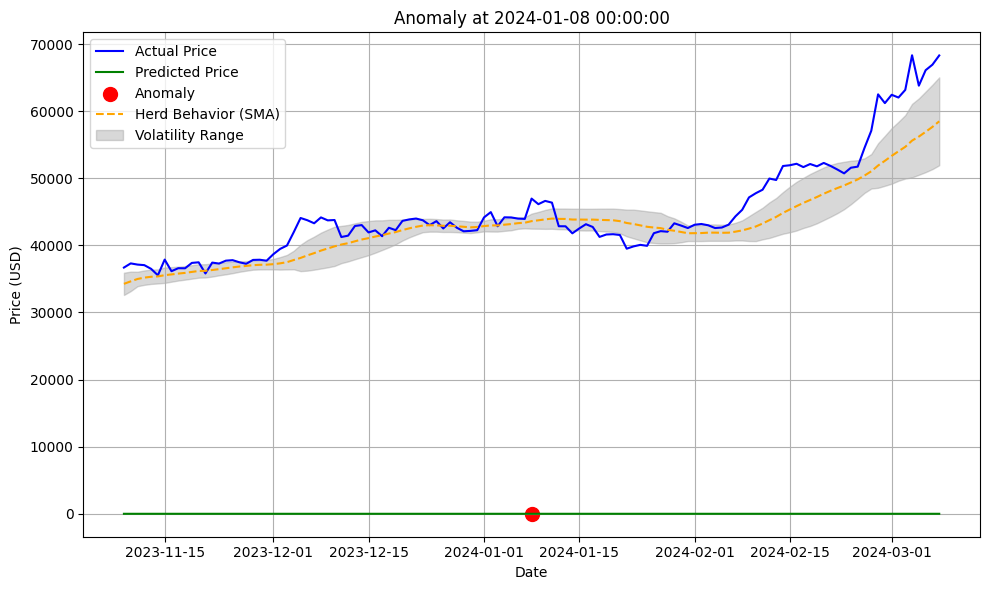

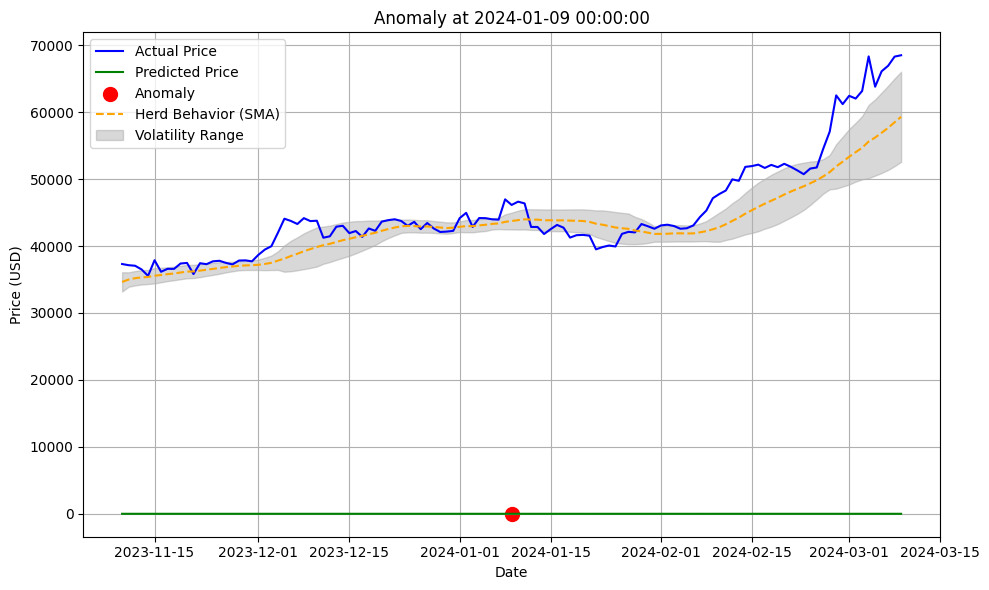

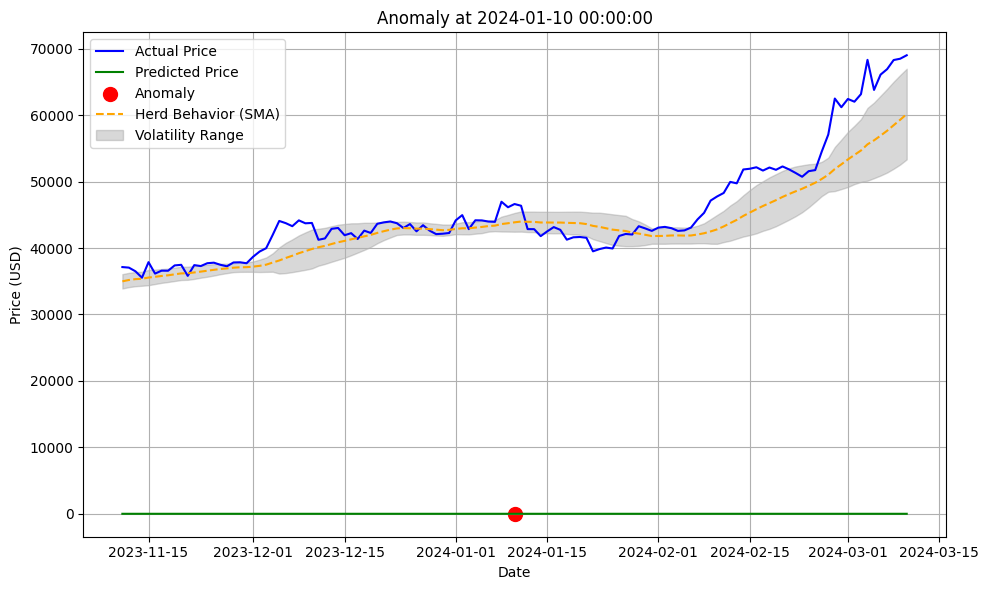

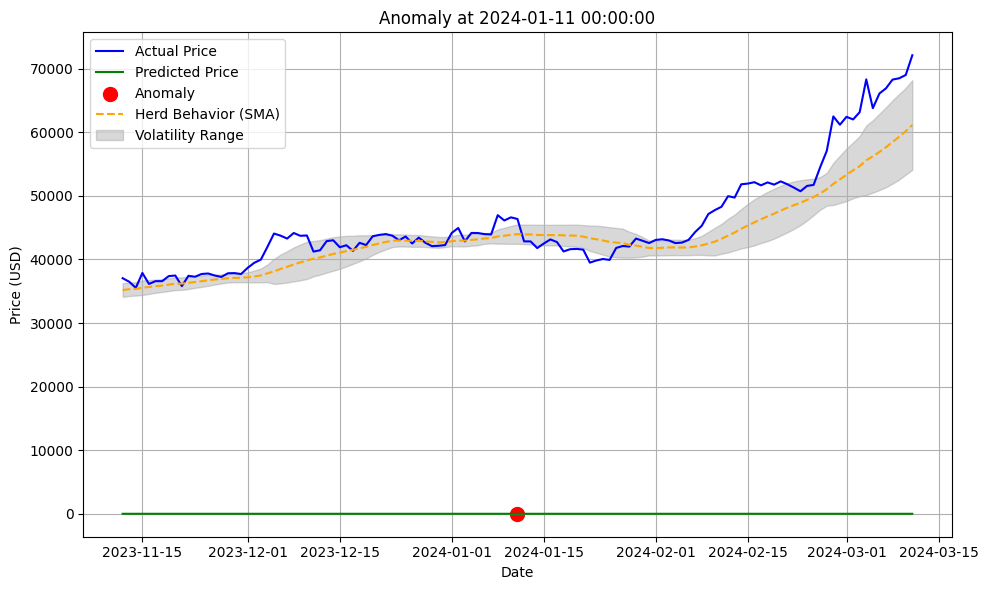

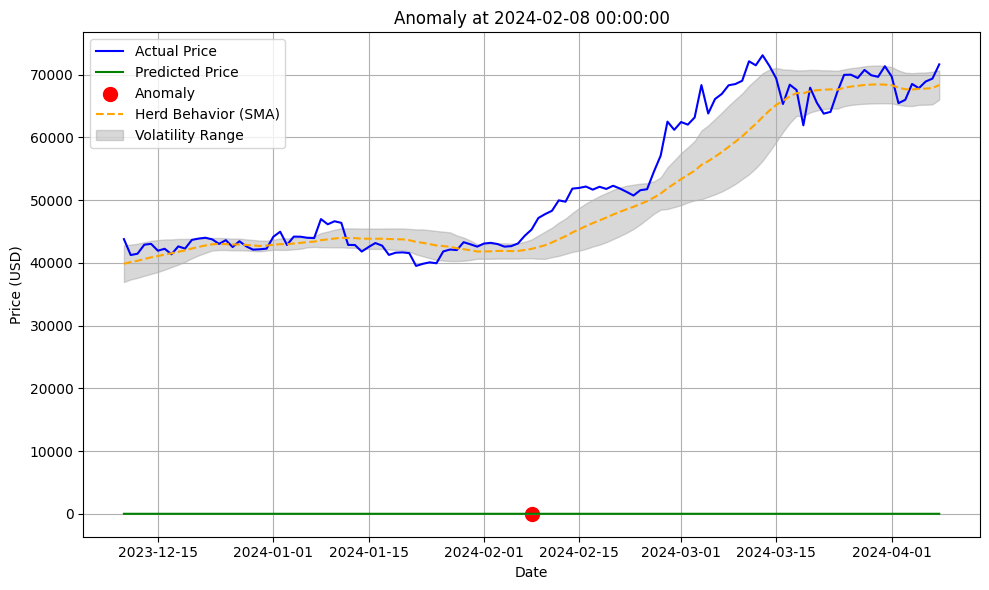

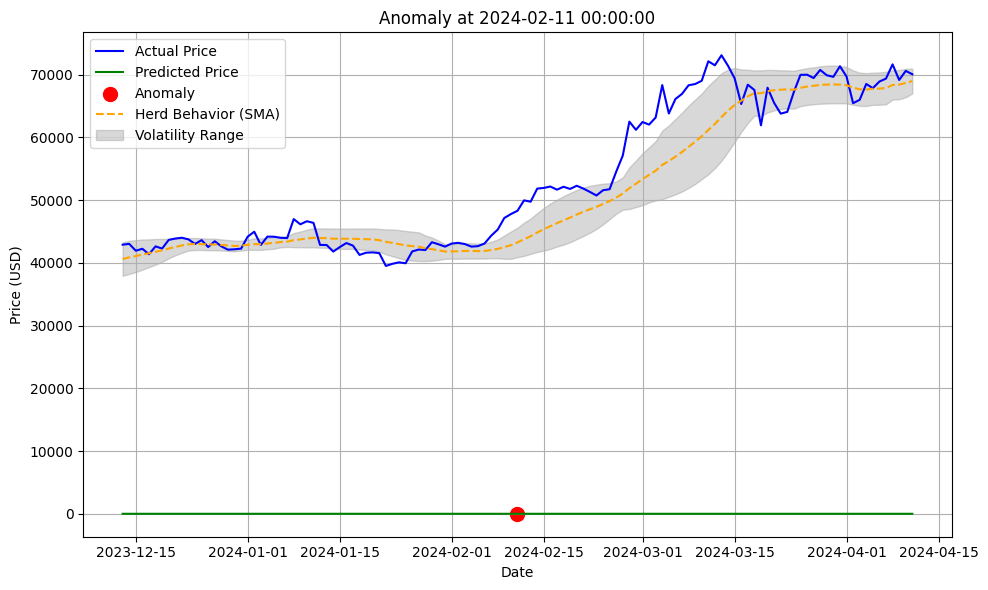

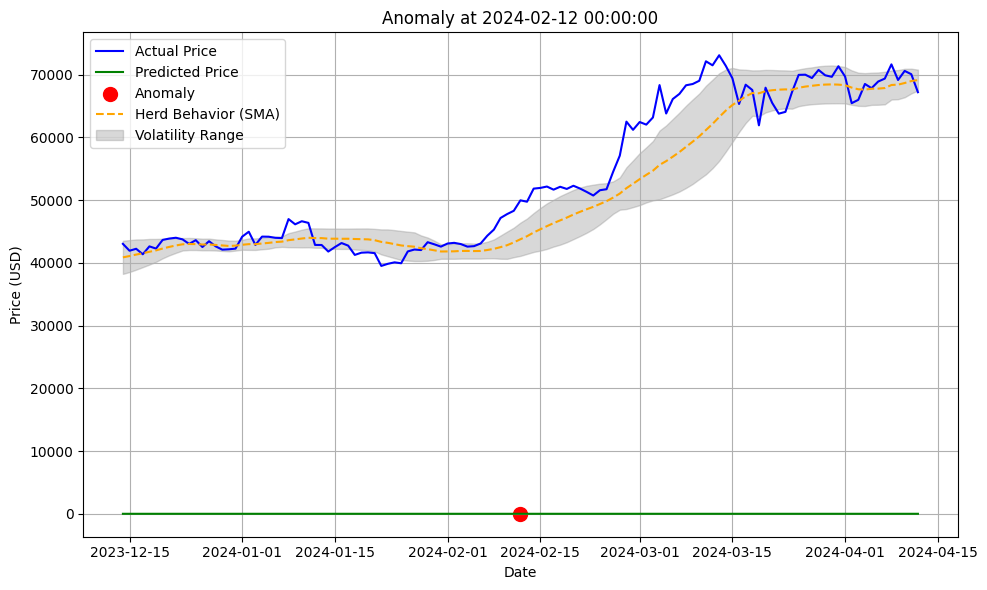

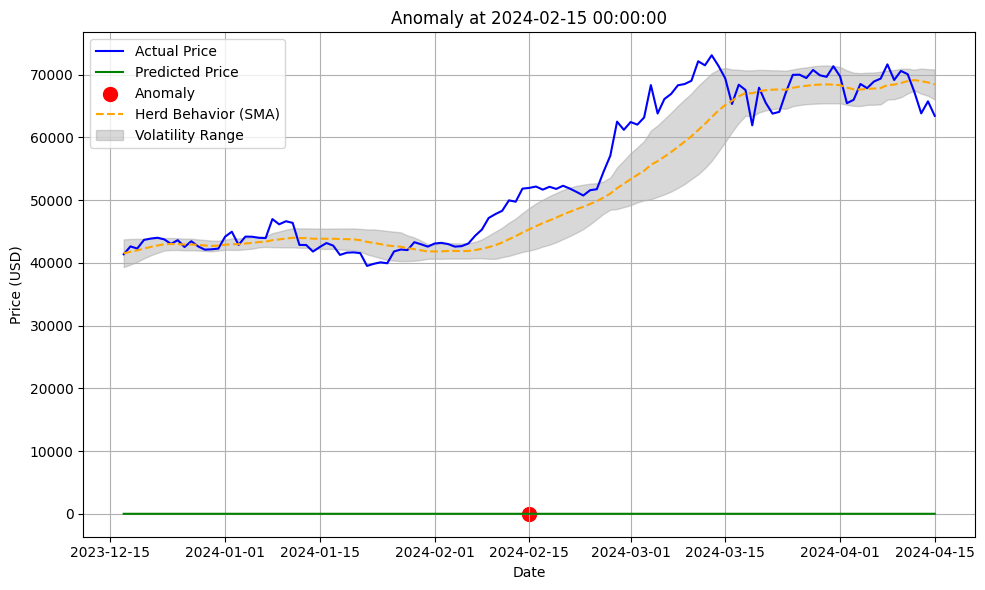

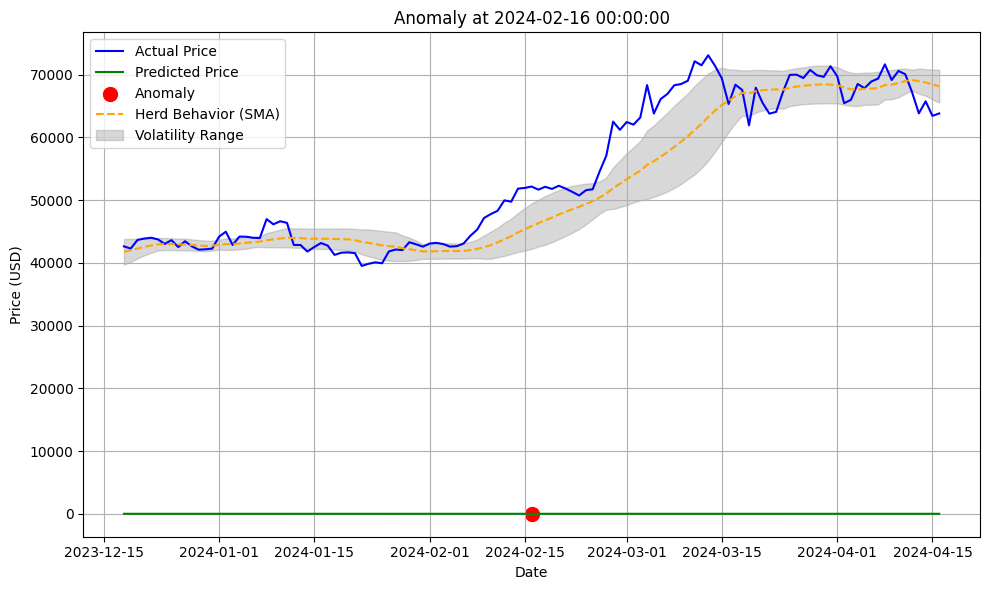

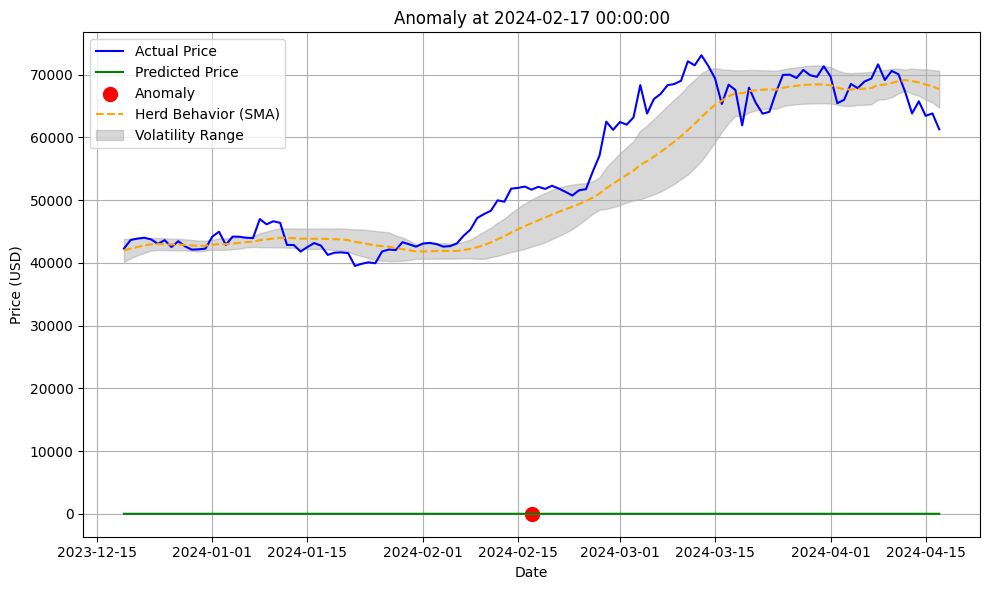

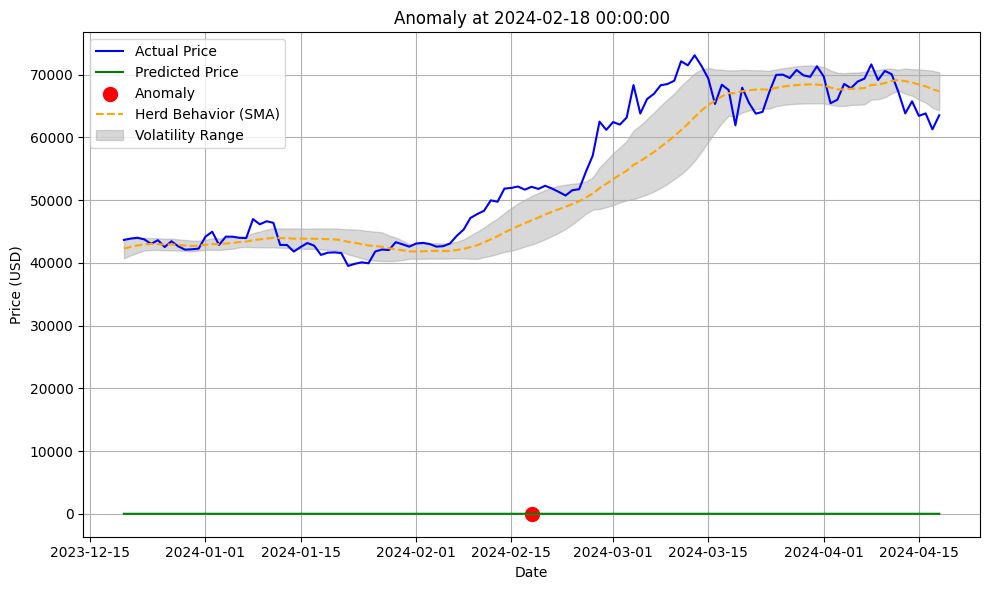

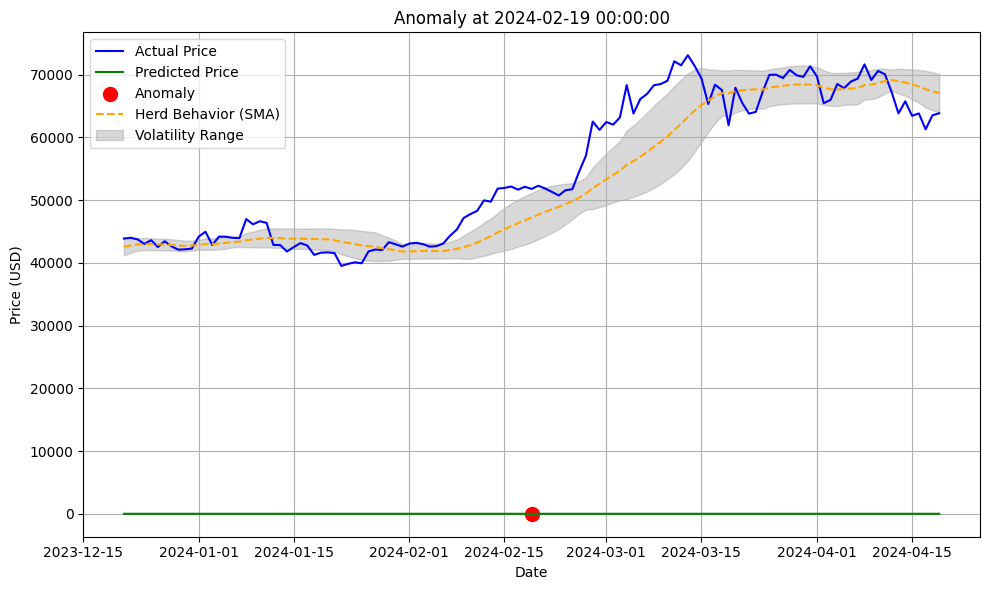

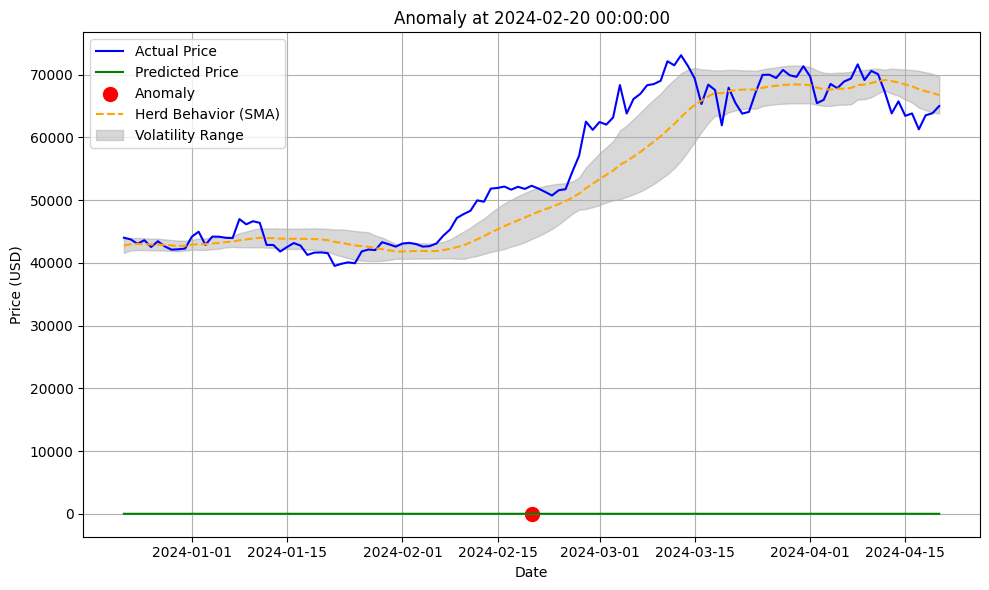

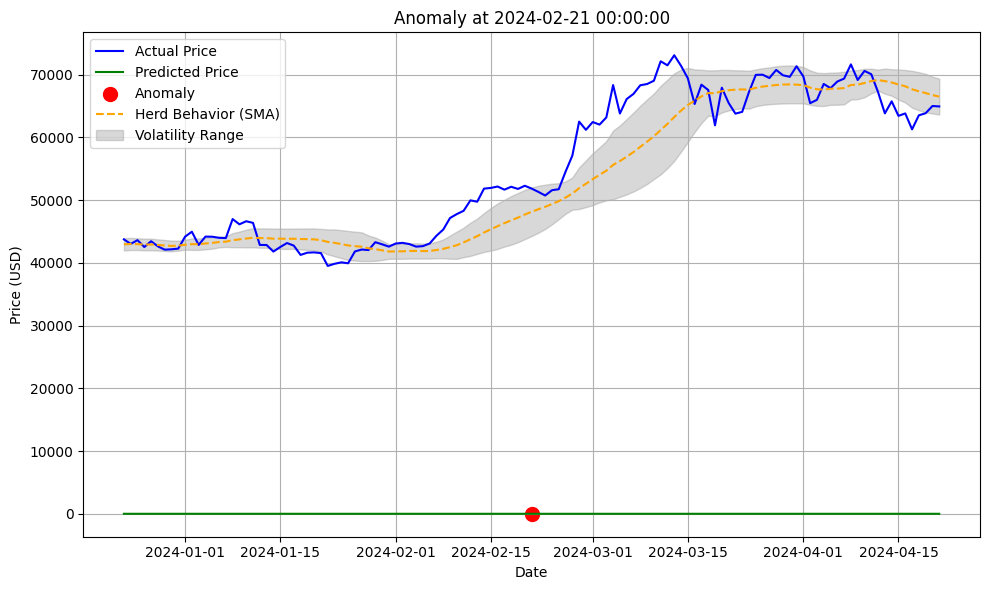

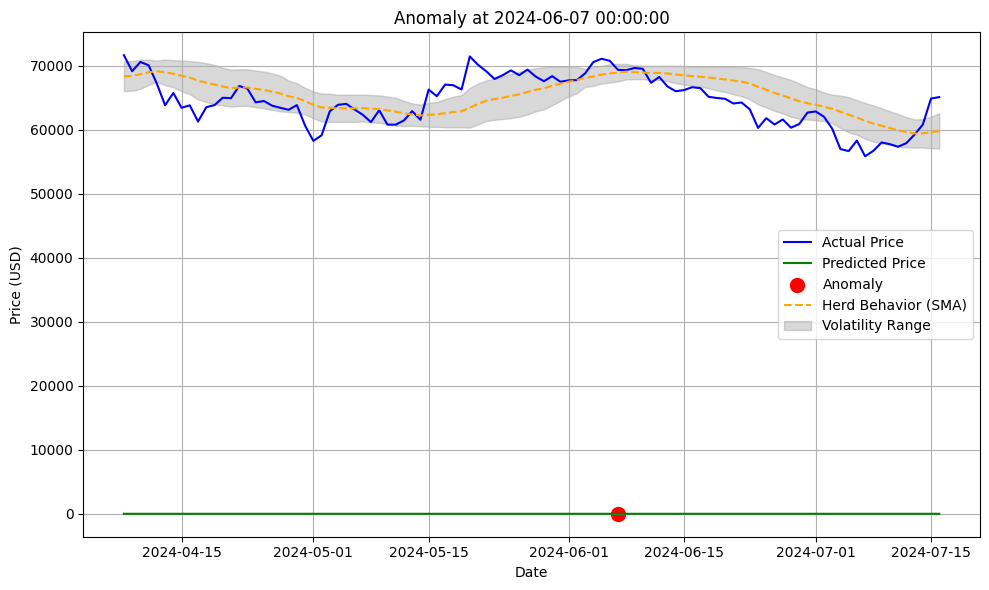

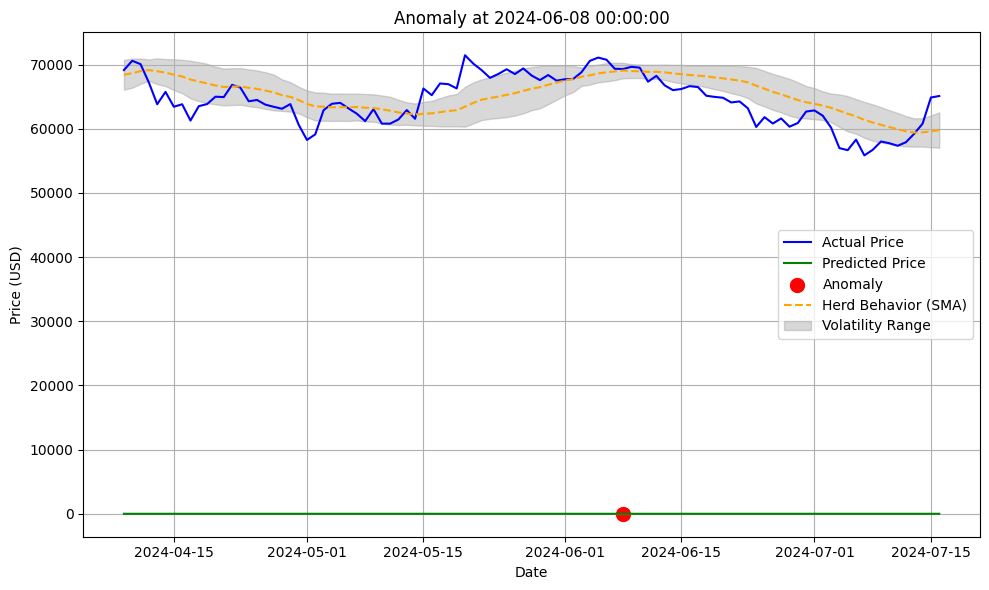

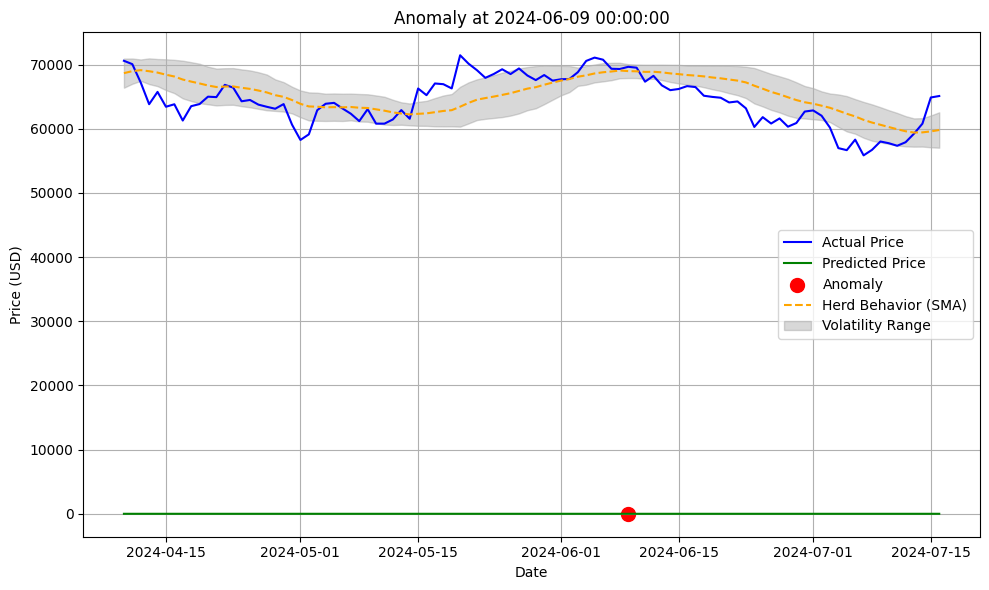

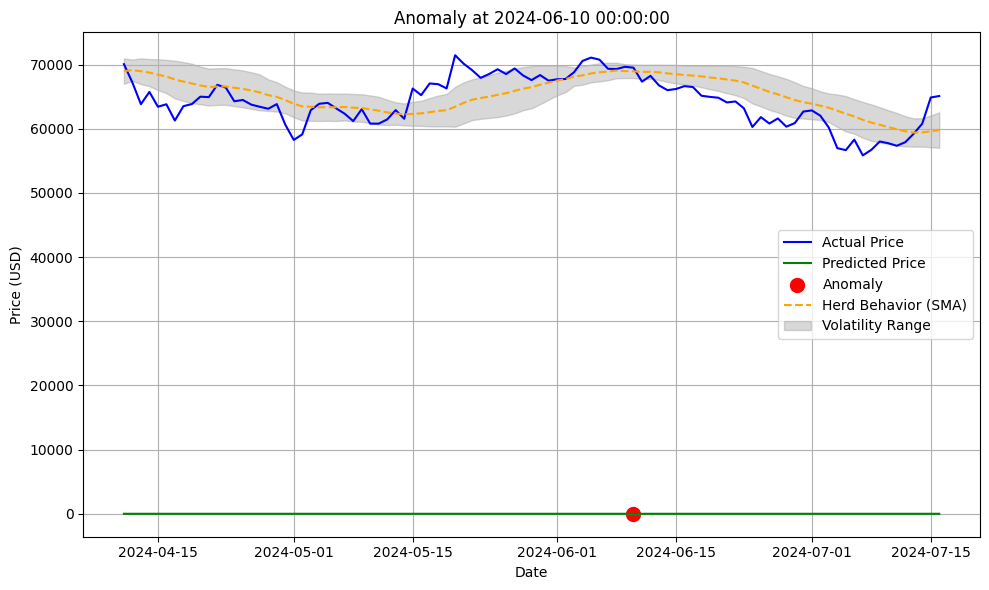

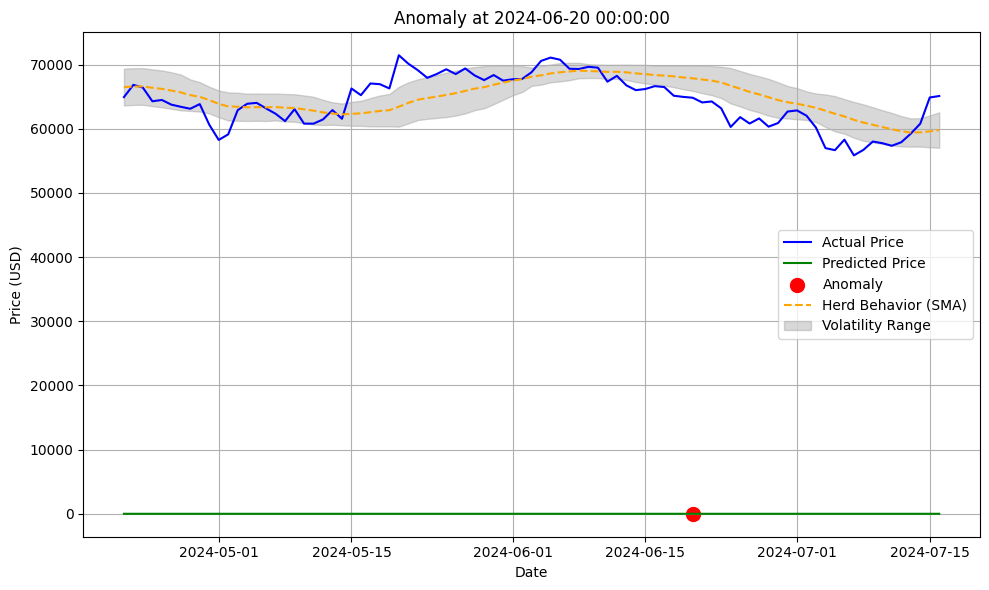

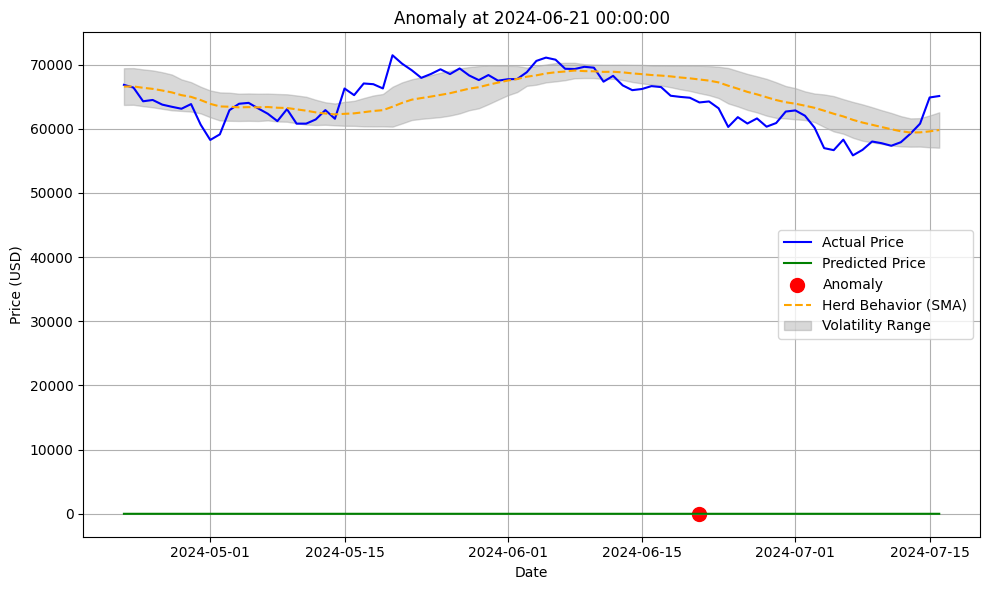

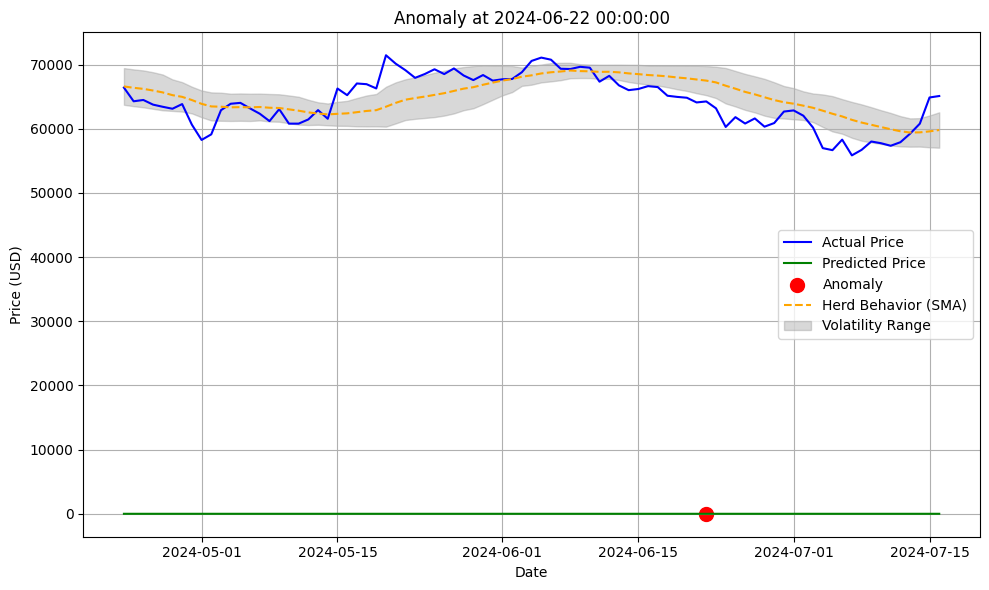

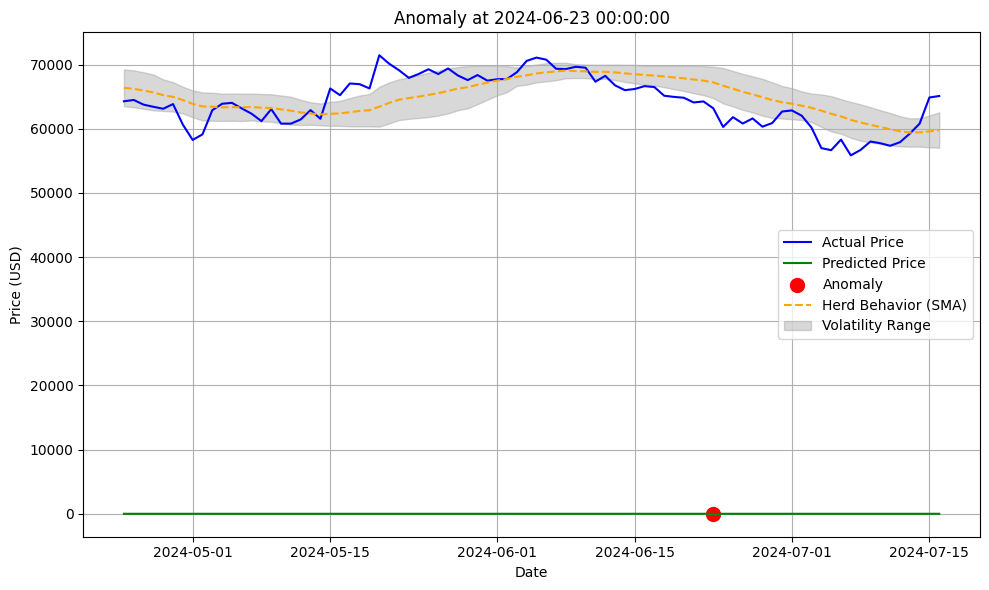

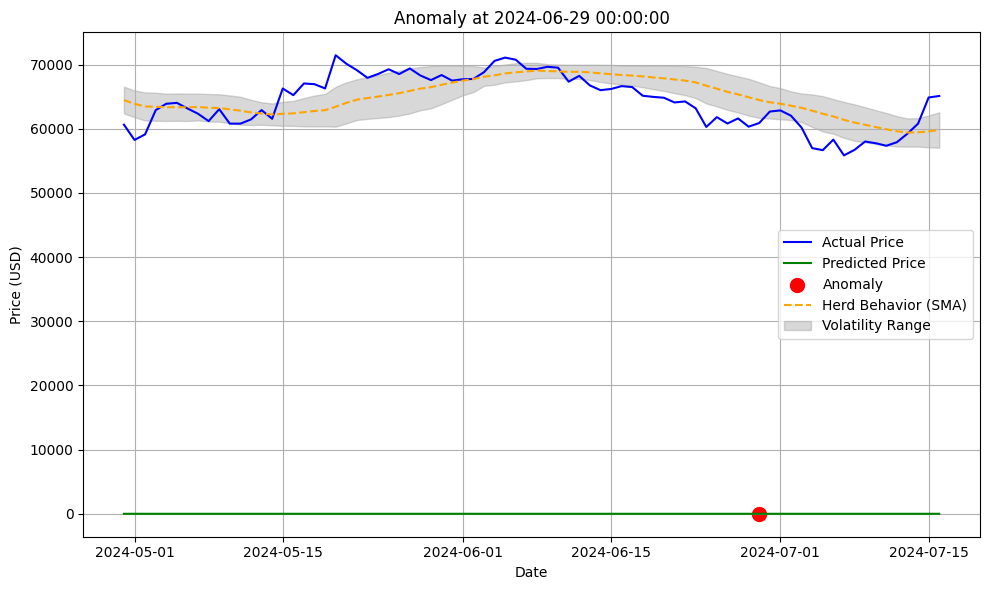

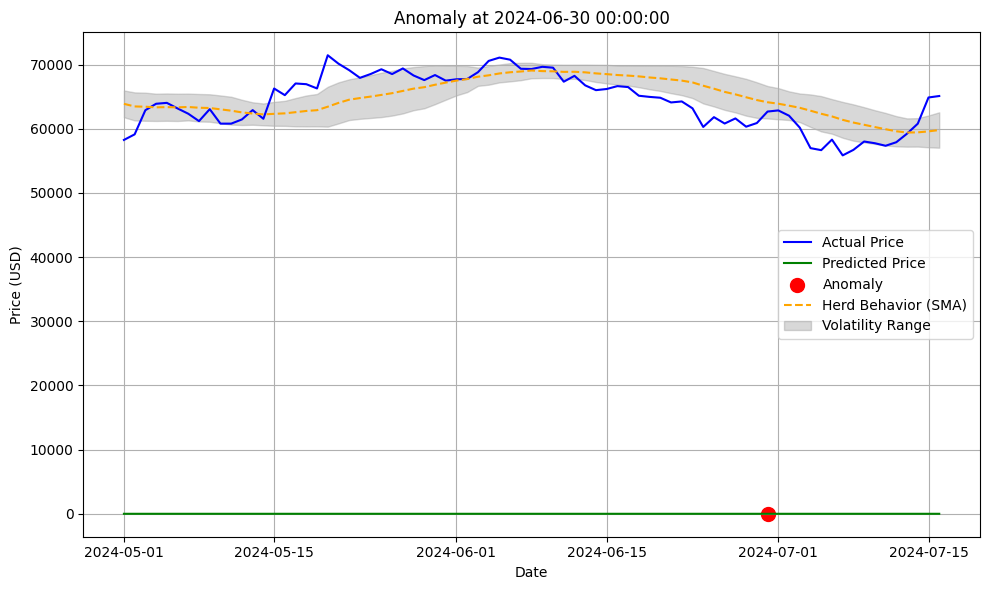

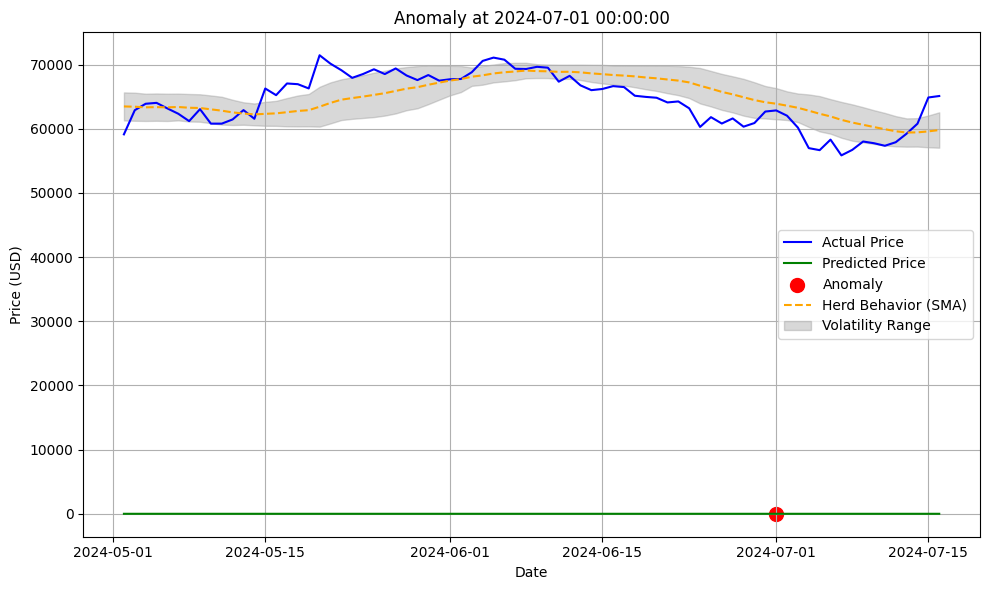

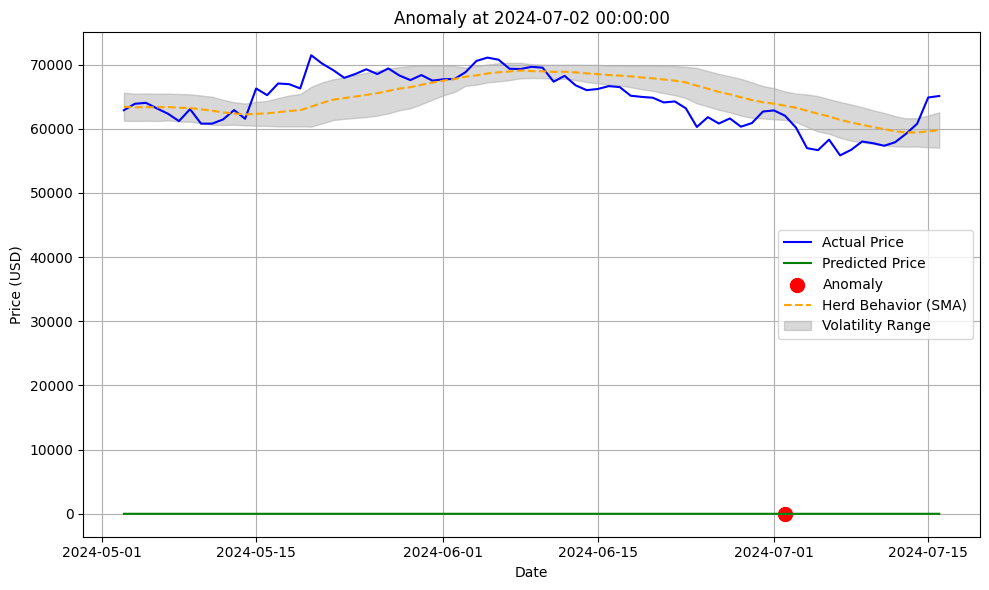

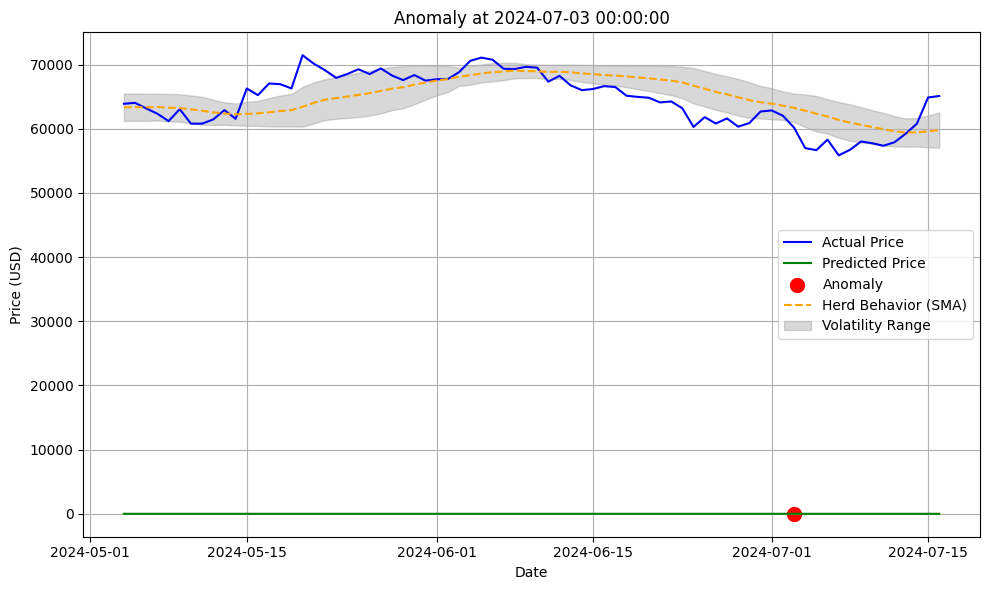

In [ ]:
# Create separate plots for each anomaly
anomaly_indices = np.where(anomalies)[0]

for idx in anomaly_indices:
    plt.figure(figsize=(10, 6))

    # Define a range around the anomaly for local context (10 days before and after)
    start_idx = max(0, idx - 60)
    end_idx = min(len(predicted_prices_lstm) - 1, idx + 60)

    # Plot the local context of the anomaly
    anomaly_range = bitcoin_data.index[start_idx:end_idx + 1]
    actual_prices = bitcoin_data['Close'][start_idx:end_idx + 1]
    predicted_prices = predicted_prices_lstm[start_idx:end_idx + 1].flatten()

    plt.plot(anomaly_range, actual_prices, label='Actual Price', color='blue')
    plt.plot(anomaly_range, predicted_prices, label='Predicted Price', color='green')
    plt.scatter(bitcoin_data.index[idx], predicted_prices_lstm[idx], color='red', label='Anomaly', s=100)

    # Add behavioral metrics for context
    plt.plot(anomaly_range, bitcoin_data['SMA_20'][start_idx:end_idx + 1], '--', label='Herd Behavior (SMA)', color='orange')
    #Corrected 'volatility' to 'Volatility' to match the actual column name
    plt.fill_between(anomaly_range,
                     bitcoin_data['SMA_20'][start_idx:end_idx + 1] - bitcoin_data['Volatility'][start_idx:end_idx + 1],
                     bitcoin_data['SMA_20'][start_idx:end_idx + 1] + bitcoin_data['Volatility'][start_idx:end_idx + 1],
                     color='grey', alpha=0.3, label='Volatility Range')

    plt.title(f'Anomaly at {bitcoin_data.index[idx]}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

KeyError: 'volatility'

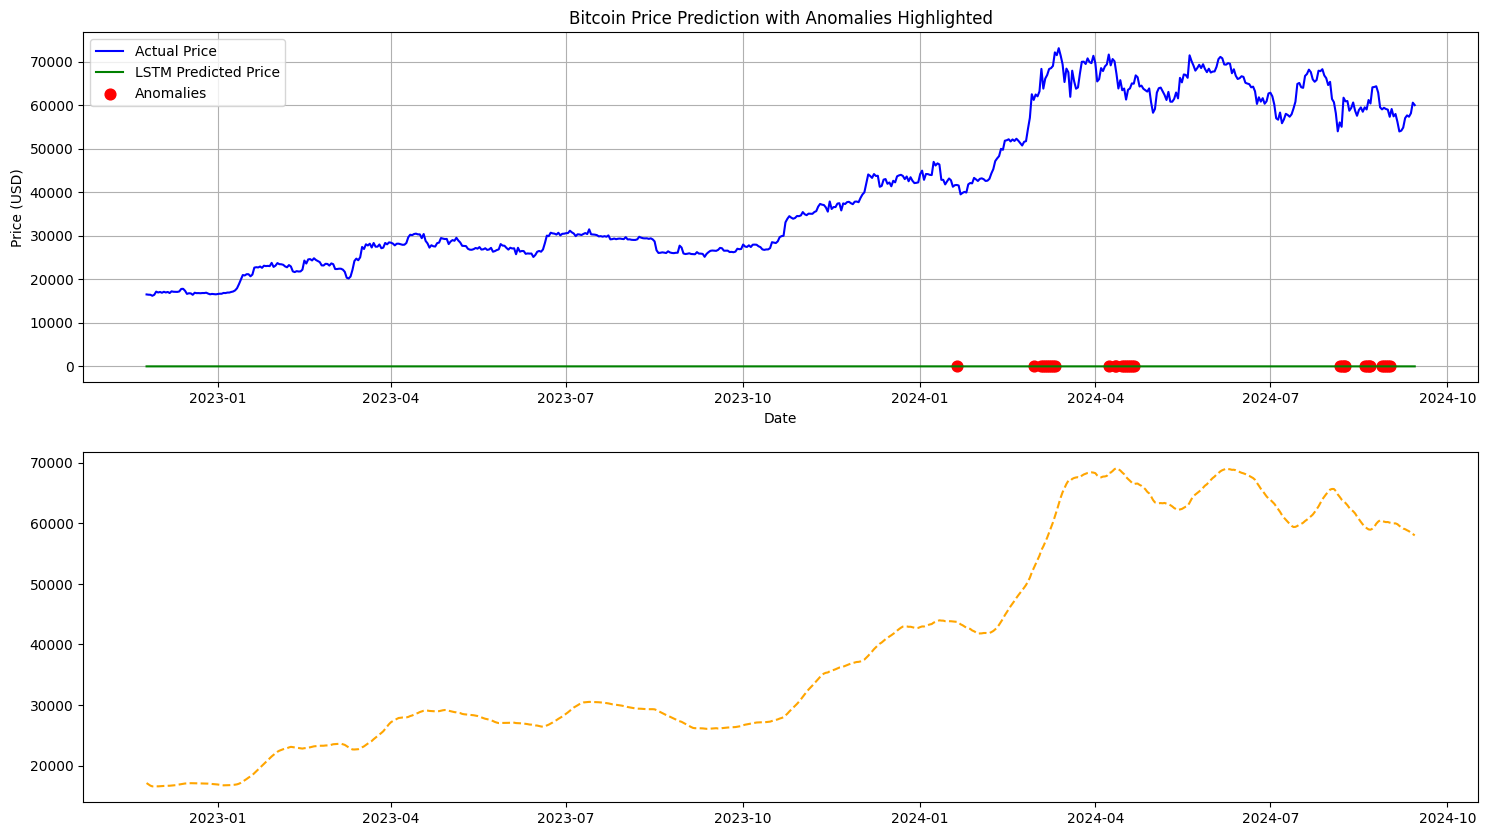

In [ ]:
# Visualization Update: Separate Plot for Anomalies and Behavioral Metrics
plt.figure(figsize=(18, 10))

# Plot actual prices
plt.subplot(2, 1, 1)
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['Close'][-len(predicted_prices_lstm):], label='Actual Price', color='blue')
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], predicted_prices_lstm, label='LSTM Predicted Price', color='green')
plt.scatter(bitcoin_data.index[-len(predicted_prices_lstm):][anomalies], predicted_prices_lstm[anomalies], color='red', label='Anomalies', s=60)
plt.title('Bitcoin Price Prediction with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Plot behavioral metrics separately for better clarity
plt.subplot(2, 1, 2)
plt.plot(bitcoin_data.index[-len(predicted_prices_lstm):], bitcoin_data['SMA_20'][-len(predicted_prices_lstm):], '--', label='Herd Behavior (SMA)', color='orange')
plt.fill_between(bitcoin_data.index[-len(predicted_prices_lstm):],
                 bitcoin_data['SMA_20'][-len(predicted_prices_lstm):] - bitcoin_data['volatility'][-len(predicted_prices_lstm):],
                 bitcoin_data['SMA_20'][-len(predicted_prices_lstm):] + bitcoin_data['volatility'][-len(predicted_prices_lstm):],
                 color='grey', alpha=0.3, label='Volatility Range')
plt.title('Behavioral Metrics: SMA and Volatility')
plt.xlabel('Date')
plt.ylabel('Behavioral Metrics')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import shap

# Step 1: Define a wrapper to flatten the input and pass it to the LSTM model for SHAP
def lstm_predict_2d(X):
    # Reshape the 2D data back into the LSTM's 3D shape for prediction
    X_reshaped = X.reshape((X.shape[0], seq_length, 1))
    return lstm_model.predict(X_reshaped)

# Step 2: Reshape the input data to 2D for SHAP
X_lstm_reshaped = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1]))  # Flatten the LSTM input

# Step 3: Use SHAP KernelExplainer with the LSTM model
explainer = shap.KernelExplainer(lstm_predict_2d, X_lstm_reshaped)

# Step 4: Calculate SHAP values
shap_values = explainer.shap_values(X_lstm_reshaped)

# Step 5: Plot SHAP values with behavioral metrics
shap.summary_plot(shap_values, features=bitcoin_data[['SMA_20', 'EMA_20', 'Volatility', 'Bollinger_Upper', 'Bollinger_Lower']].values[-len(X_lstm):],
                  feature_names=['Herd Behavior (SMA)', 'Momentum (EMA)', 'Volatility', 'Fear (Bollinger Upper)', 'Greed (Bollinger Lower)'])


78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


  0%|          | 0/2486 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
 71228/168427 ━━━━━━━━━━━━━━━━━━━━ 33:36 21ms/step

KeyboardInterrupt: 

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.4 MB/s eta 0:00:00
